# FINA - Results Exploration

In [51]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt

tqdm.pandas()
sns.set(rc={'figure.figsize':(13,10)})

In [5]:
%%time
results_df = pd.read_parquet('./data/results.parquet')
results_df.fillna(0, inplace=True)

CPU times: user 8.57 s, sys: 822 ms, total: 9.39 s
Wall time: 8.47 s


In [7]:
%%time
results_df.head()

CPU times: user 151 µs, sys: 0 ns, total: 151 µs
Wall time: 158 µs


,DisciplineName,EventName,EventResultUtcDateTime,Gender,SportCode,IsSummary,Order,PhaseName,Results,AthleteResultAge,...,NATName,Points,Qualified,RT,Rank,RecordType,ResultId,Splits,Time,TimeBehind
0,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 17.0, 'BiographyId': None...",17.0,...,0,0.0,0,0,1.0,0,R1165798,[],1:12.40,0
1,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 18.0, 'BiographyId': None...",18.0,...,0,0.0,0,0,2.0,0,R1165764,[],1:12.80,00.40
2,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 18.0, 'BiographyId': None...",18.0,...,0,0.0,0,0,3.0,0,R1165709,[],1:14.20,01.80
3,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 24.0, 'BiographyId': None...",24.0,...,0,0.0,0,0,4.0,0,R1165829,[],1:15.40,03.00
4,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 17.0, 'BiographyId': None...",17.0,...,0,0.0,0,0,5.0,0,R1165001,[],1:20.80,08.40


In [8]:
results_df['Time'][0]

'1:12.40'

In [9]:
def to_seconds(result_time):
    time_split = result_time.split(':')
    total_seconds = 0
    
    if len(time_split) == 3:
        total_seconds = float(time_split[0]) * 60 * 60
        total_seconds += float(time_split[1]) * 60
        total_seconds += float(time_split[2])
        
        return total_seconds
    
    if len(time_split) == 2:
        total_seconds = float(time_split[0]) * 60
        total_seconds += float(time_split[1])
        
        return total_seconds
    
    return float(result_time)

In [10]:
print(to_seconds(results_df['Time'][0]))
print(to_seconds('59.00'))
print(to_seconds('2:10:53.00'))

72.4
59.0
7853.0


In [11]:
results_df['Time_Seconds'] = results_df['Time'].progress_apply(lambda x: to_seconds(str(x)))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 465945/465945 [00:00<00:00, 589369.82it/s]


In [13]:
results_df.head()

,DisciplineName,EventName,EventResultUtcDateTime,Gender,SportCode,IsSummary,Order,PhaseName,Results,AthleteResultAge,...,Points,Qualified,RT,Rank,RecordType,ResultId,Splits,Time,TimeBehind,Time_Seconds
0,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 17.0, 'BiographyId': None...",17.0,...,0.0,0,0,1.0,0,R1165798,[],1:12.40,0,72.4
1,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 18.0, 'BiographyId': None...",18.0,...,0.0,0,0,2.0,0,R1165764,[],1:12.80,00.40,72.8
2,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 18.0, 'BiographyId': None...",18.0,...,0.0,0,0,3.0,0,R1165709,[],1:14.20,01.80,74.2
3,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 24.0, 'BiographyId': None...",24.0,...,0.0,0,0,4.0,0,R1165829,[],1:15.40,03.00,75.4
4,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 17.0, 'BiographyId': None...",17.0,...,0.0,0,0,5.0,0,R1165001,[],1:20.80,08.40,80.8


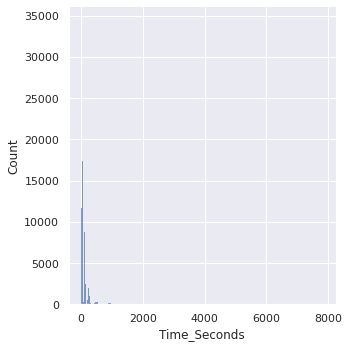

In [23]:
sns.displot(results_df, x="Time_Seconds", palette="crest", fill=True, alpha=.7, linewidth=0)

In [65]:
results_df_filtered = results_df.loc[(results_df.PhaseName == 'Finals') & (results_df.DisciplineName == 'Women 100m Freestyle')] # & (results_df.EventName == 'Olympic Games Paris 1924')
results_df_filtered['Year'] = pd.DatetimeIndex(pd.to_datetime(results_df_filtered.EventResultUtcDateTime, infer_datetime_format=True)).year
results_df_filtered.shape[0]

/tmp/ipykernel_109967/1999655644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_filtered['Year'] = pd.DatetimeIndex(pd.to_datetime(results_df_filtered.EventResultUtcDateTime, infer_datetime_format=True)).year


2374

In [66]:
results_df_filtered.head()

,DisciplineName,EventName,EventResultUtcDateTime,Gender,SportCode,IsSummary,Order,PhaseName,Results,AthleteResultAge,...,Qualified,RT,Rank,RecordType,ResultId,Splits,Time,TimeBehind,Time_Seconds,Year
0,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 17.0, 'BiographyId': None...",17.0,...,0,0,1.0,0,R1165798,[],1:12.40,0,72.4,1924
1,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 18.0, 'BiographyId': None...",18.0,...,0,0,2.0,0,R1165764,[],1:12.80,00.40,72.8,1924
2,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 18.0, 'BiographyId': None...",18.0,...,0,0,3.0,0,R1165709,[],1:14.20,01.80,74.2,1924
3,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 24.0, 'BiographyId': None...",24.0,...,0,0,4.0,0,R1165829,[],1:15.40,03.00,75.4,1924
4,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,False,0.0,Finals,"{'AthleteResultAge': 17.0, 'BiographyId': None...",17.0,...,0,0,5.0,0,R1165001,[],1:20.80,08.40,80.8,1924


In [67]:
results_df_filtered['Time_Seconds'].describe()

count    2374.000000
mean       55.241028
std         4.344810
min         0.000000
25%        53.920000
50%        55.150000
75%        56.407500
max        80.800000
Name: Time_Seconds, dtype: float64

In [68]:
results_df_filtered = results_df_filtered.loc[(results_df_filtered.Time_Seconds > 0) & (results_df_filtered.Time_Seconds <= 2000)]
results_df_filtered['Time_Seconds'].describe()

count    2365.000000
mean       55.451247
std         2.699515
min        50.580000
25%        53.940000
50%        55.150000
75%        56.410000
max        80.800000
Name: Time_Seconds, dtype: float64

CPU times: user 13.7 s, sys: 358 ms, total: 14.1 s
Wall time: 13.5 s


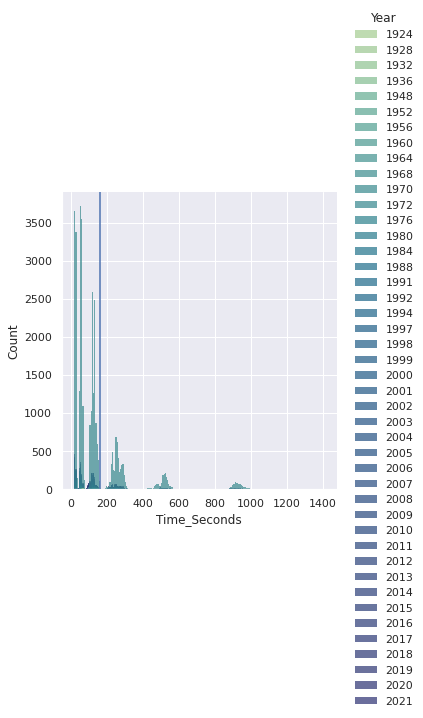

In [63]:
%%time
sns.displot(results_df_filtered, x="Time_Seconds", hue="Year", palette="crest", fill=True, alpha=.7, linewidth=0)
mean = results_df_filtered['Time_Seconds'].mean()
plt.axvline(mean)

<AxesSubplot:xlabel='Year', ylabel='Time_Seconds'>

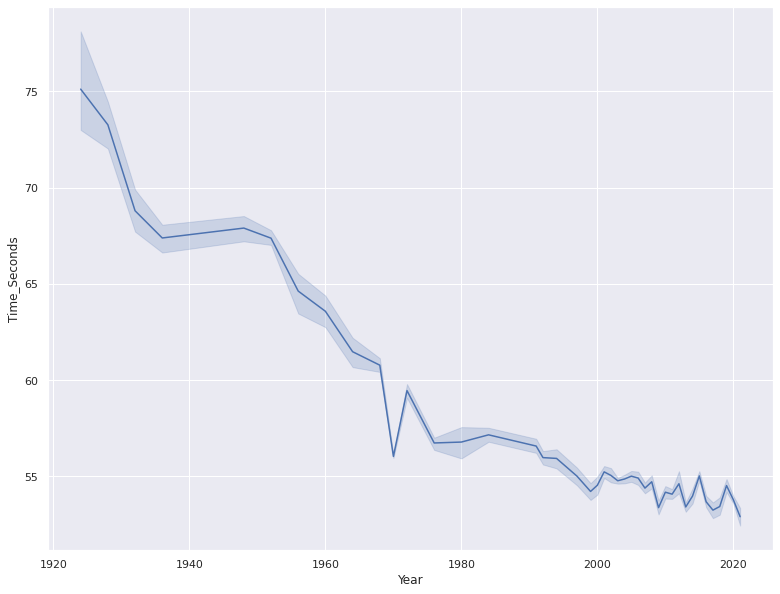

In [69]:
sns.lineplot(data=results_df_filtered, x="Year", y="Time_Seconds")